## Домашнее задание № 4

### Ансамблевые методы 

**Дедлайн: 3.06.2020 0:30** 
Сопровождайте код изображениями и комментариями. Не игнорируйте вопросы, ваши выводы тоже оцениваются. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше. Не забывайте подписывать графики и будет вам счастье!

**Максимальный балл: 10**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

**0. (0 баллов) ** Загрузите [датасет](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data), в нем вы найдете данные опрошенных женщин из индейского племени Пима. Будем решать задачу бинарной классификации: в колонке Outcome лежит метка наличия или отсутствия диабета - это наша целевая переменная. Есть ли пропущенные значения?

In [2]:
!wget = https://www.dropbox.com/s/g0jaiimevu1qfv7/diabetes.csv
data = pd.read_csv('./diabetes.csv')

--2020-05-30 09:54:22--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2020-05-30 09:54:22--  https://www.dropbox.com/s/g0jaiimevu1qfv7/diabetes.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/g0jaiimevu1qfv7/diabetes.csv [following]
--2020-05-30 09:54:22--  https://www.dropbox.com/s/raw/g0jaiimevu1qfv7/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5211f76203292fec924ab0b6aa.dl.dropboxusercontent.com/cd/0/inline/A4tP7n1jq-E9Ih21BFpTJDy81bnpsSHU1H3OX4i9QORIdMVv7bmDbuYQnSlU91f_TyrUsSwQs7Qe_uMF0Mzqrte0jEJaSSbJjc4YjfrRgg2lv4JHLW5X5pjuNaLdTGwSEns/file# [following]
--2020-05-30 09:54:22--  https://uc5211f76203292fec924ab0b6aa.dl.dropboxusercontent.

In [3]:
#проверим, есть ли пропуски в Outcome?
data['Outcome'].isnull().any()

False

In [0]:
#В целевой переменной пропусков нет.

**1. (0.5 балла)** Как вы думаете, является ли наличие нулей в некоторых колонках фактом того, что эти признаки имеют пропущенные значения? Замените нули на среднее значение признака там, где считаете это целесообразным.

In [7]:
#Проверим, какие признаки у нас вообще есть
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
print('Пропусков глюкозы:') 
len(data[(data['Glucose'] == 0)])


Пропусков глюкозы:


5

In [0]:
print('Пропусков давления:') 
len(data[(data['BloodPressure'] == 0)])

Пропусков давления:


35

In [0]:
print('Пропусков толщины кожной складки:') 
len(data[(data['SkinThickness'] == 0)])

Пропусков толщины кожной складки:


227

In [0]:
print('Пропусков инсулина:') 
len(data[(data['Insulin'] == 0)])

Пропусков инсулина:


374

In [0]:
print('Пропусков индекса массы тела:') 
len(data[(data['BMI'] == 0)])

Пропусков индекса массы тела:


11

In [0]:
print('Пропусков родословной:') 
len(data[(data['DiabetesPedigreeFunction'] == 0)])

Пропусков родословной:


0

In [0]:
print('Пропусков возраста:') 
len(data[(data['Age'] == 0)])

Пропусков возраста:


0

In [0]:
#В строке с беременностями нули оправданы. Это не пропуск.
#В строке с содержанием глюкозы - нет, нужно заменить на среднее значение, т.к. глюкоза в крови человека по-любому есть. Значит значения пропущены
#В строке c давлением - то же самое, нулевого быть не может. 0 -значит пропущено.
#Толщина кожной складки трицепса нулем тоже быть не может - пропущенное значение.
#Инсулин в крови также есть у всех - нули = пропуски.
#Индекс массы тела тоже не может быть нулем. - Это пропуски
#Родословная составляющая диабета может быть нулем, может, совсем не подверджен генетически человек диабету. Но таких данных у нас нет.
#Возраст тоже может быть нулем. Однако таких данных у нас нет.
#Outcome - бинарный признак, он должен быть 0 или 1.

In [0]:
#Заменим все нули там, где они значат пропуски на среднее значение, чтобы не нарушать баланс выборки.

In [9]:
data.loc[data['Glucose'] == 0, 'Glucose'] = data['Glucose'].mean()
len(data[(data['Glucose'] == 0)])

0

In [10]:
data.loc[data['BloodPressure'] == 0, 'BloodPressure'] = data['BloodPressure'].mean()
len(data[(data['BloodPressure'] == 0)])

0

In [11]:
data.loc[data['SkinThickness'] == 0, 'SkinThickness'] = data['SkinThickness'].mean()
len(data[(data['SkinThickness'] == 0)])

0

In [12]:
data.loc[data['Insulin'] == 0, 'Insulin'] = data['Insulin'].mean()
len(data[(data['Insulin'] == 0)])

0

In [13]:
data.loc[data['BMI'] == 0, 'BMI'] = data['BMI'].mean()
len(data[(data['BMI'] == 0)])

0

In [14]:
#проверим, жива ли таблица
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1
767,1,93.0,70.0,31.000000,79.799479,30.4,0.315,23,0


**2. (1 балл)** Визуализируйте распределение признаков по отдельности для больных диабетом и здоровых. Ваши графики должны быть примерно такими:

![Image](https://d.radikal.ru/d03/2005/f8/0ffb9443cbcf.png)

In [15]:
#создаем два массива с больными диабетом и здоровыми
data_sick = data[(data['Outcome'] == 1)]
data_well = data[(data['Outcome'] == 0)]
data_sick.head() #проверили

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
6,3,78.0,50.0,32.000000,88.000000,31.0,0.248,26,1
8,2,197.0,70.0,45.000000,543.000000,30.5,0.158,53,1


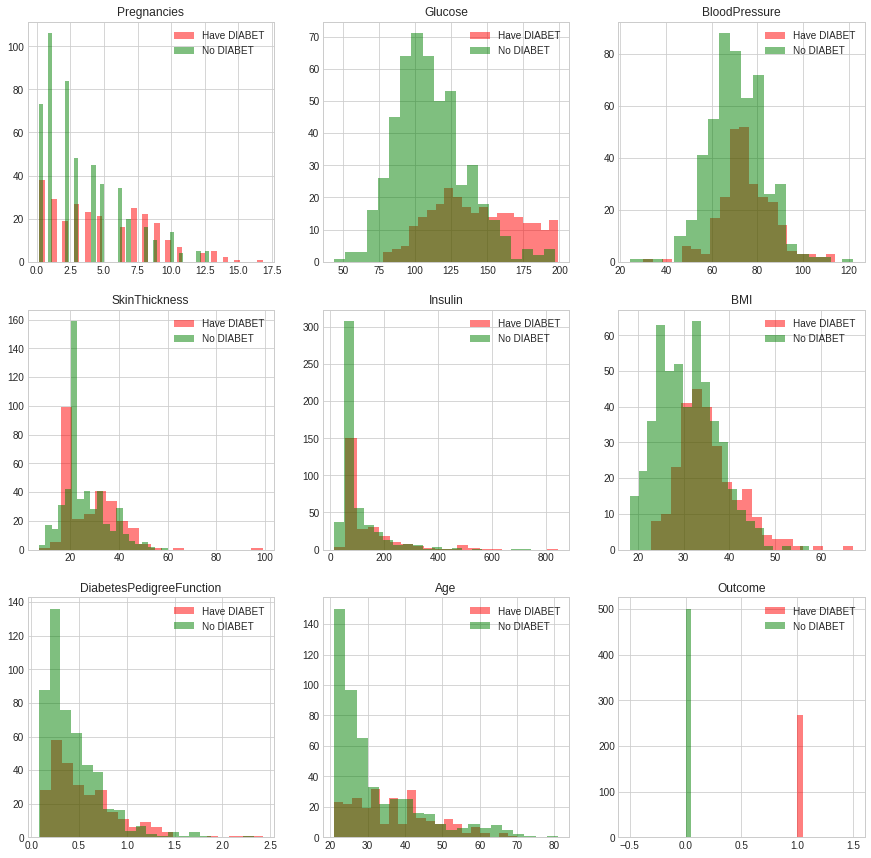

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
featname = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 15))

def nevmeste(r):
    if featname[r] == 'Pregnancies':
        return 'bar'
    else:
        return 'stepfilled'
#Это я подгоняю под вид как на примере.

for i, s in enumerate(featname):
    key = featname[i]
    plt.subplot(3, 3, i+1)
    plt.hist(data_sick[key], rwidth=0.5, histtype=nevmeste(i), bins=20, label='Have DIABET', color='red', alpha=0.5)
    plt.hist(data_well[key], rwidth=0.5, histtype=nevmeste(i), bins=20, label='No DIABET', color='green', alpha=0.5)
    plt.legend()
    plt.title(featname[i])

In [0]:
#Визуализировали. Графики похожи, но немного отличаются, т.к. мы исправили нулевые значения, там где они не нужны, а на примере - нет.

**3. (2 балла)** Разбейте данные на обучающую и тестовую часть в соотношении 70:30. Обучите *BaggingClassifier* на деревьях (поставьте параметр *base_estimator = DecisionTreeClassifier()*) и *RandomForest*. Возьмите количество базовых алгоритмов, равное 10. Посчитайте accuracy, recall и precision. Есть ли какая-то разница между моделями и их результатами? Как вы думаете, почему получились такие результаты?

*tip: создайте отдельную функцию для вывода метрик качества;*

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [0]:
#разбиваем выборку на трейн и тест
X, y = data.values[:, :-1], data.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
#функция метрики качества и сразу в ней предсказание
def Quality(mode): #mode - какую модель выбираем
    print('Accuracy TRAIN = ', accuracy_score(y_train, mode.predict(X_train)), 'Accuracy TEST = ', accuracy_score(y_test, mode.predict(X_test)))
    print('Precision TRAIN = ', precision_score(y_train, mode.predict(X_train)), 'Precision TEST = ', precision_score(y_test, mode.predict(X_test)))
    print('Recall TRAIN = ', recall_score(y_train, mode.predict(X_train)), 'Recall TEST = ', recall_score(y_test, mode.predict(X_test)))

In [0]:
from sklearn.ensemble import BaggingClassifier

In [58]:
#сначала обучим решающее дерево, написано, что там base_estimator по умолчанию стоит DecisionTreeClassifier(), поэтому тут ниче не прописываю.
clf = BaggingClassifier(n_estimators = 10, random_state = 11) #рандом стейт, чтобы при запуске при проверке выдавало те же результаты
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=11, verbose=0,
                  warm_start=False)

In [59]:
Quality(clf)

Accuracy TRAIN =  0.9832402234636871 Accuracy TEST =  0.7229437229437229
Precision TRAIN =  0.9943181818181818 Precision TEST =  0.647887323943662
Recall TRAIN =  0.9562841530054644 Recall TEST =  0.5411764705882353


In [0]:
#Запомним результаты бэггинга РЕШАЮЩИХ ДЕРЕВЬЕВ: экураси на тесте: 0.72, пресижн 0,65, рекол 0,54
#Результаты чего-то не очень, особенно реколл...

In [62]:
from sklearn.ensemble import RandomForestClassifier

#теперь учим лес
les_clf = RandomForestClassifier(n_estimators = 10, random_state = 11)
les_clf.fit(X_train, y_train)
Quality(les_clf)

Accuracy TRAIN =  0.9795158286778398 Accuracy TEST =  0.7748917748917749
Precision TRAIN =  0.9942528735632183 Precision TEST =  0.7538461538461538
Recall TRAIN =  0.9453551912568307 Recall TEST =  0.5764705882352941


In [0]:
#Результаты СЛУЧ ЛЕСА: экураси на тесте: 0.77, пресижн 0,75, рекол 0,58
#Да, между этими моделями разница есть, не прямо чтобы очень значительно, но случайный лес решает задачу лучше.
#А существует эта разница потому, что в случайном лесе у нас выбираются случайные признаки, и из них выбирается
#наиболее значимый для последующего распределения, в то время как в бэггинге используются все признаки (могут оказаться и не значимые)

**4. (2 балл)** Для случайного леса проанализируйте значение ROC-AUC на этих же данных в зависимости от изменения параметров:
* *n_estimators* (можно перебрать около 10 значений из отрезка от 10 до 1500)
* *min_samples_leaf* (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости ROC-AUC от этих параметров. Какие выводы можете сделать?

In [0]:
n = [10, 20, 30, 50, 100, 120, 150, 300, 700, 1500] #10 разных кол-в estimators, я выбрал такие, т.к. с ростом estimators сначала у нас растет качество
#до какого-то момента, но потом оно перестает расти, поэтому чтобы не переобучится - слишком большие брать не будем.
m = [1, 2, 3, 4, 5, 6, 7, 10, 25, 50] #10 минимальных количеств объектов в листе. Я выбрал такие, потому что по умолчанию у нас 1, но мы можем объединять
#их по-другому, вдруг качество улучшится? Проверим.

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [66]:
roc_znach = []
for i in n:
    les_clf = RandomForestClassifier(n_estimators = i, random_state=11)
    les_clf.fit(X_train, y_train)
    les_preds = les_clf.predict(X_test)
    s = roc_auc_score(y_test, les_preds)
    q = roc_auc_score(y_train, les_clf.predict(X_train))
    roc_znach.append(s)
    print('n_estimators = ', i, 'ROC-AUC на TRAIN = ', q, 'ROC-AUC на TEST = ', s, end='\n')

n_estimators =  10 ROC-AUC на TRAIN =  0.9712651662498841 ROC-AUC на TEST =  0.7334407735697018
n_estimators =  20 ROC-AUC на TRAIN =  0.9918032786885246 ROC-AUC на TEST =  0.7275584206285254
n_estimators =  30 ROC-AUC на TRAIN =  1.0 ROC-AUC на TEST =  0.7501208702659146
n_estimators =  50 ROC-AUC на TRAIN =  1.0 ROC-AUC на TEST =  0.7476631748589847
n_estimators =  100 ROC-AUC на TRAIN =  1.0 ROC-AUC на TEST =  0.7442385173247381
n_estimators =  120 ROC-AUC на TRAIN =  1.0 ROC-AUC на TEST =  0.746696212731668
n_estimators =  150 ROC-AUC на TRAIN =  1.0 ROC-AUC на TEST =  0.7618855761482675
n_estimators =  300 ROC-AUC на TRAIN =  1.0 ROC-AUC на TEST =  0.7668009669621272
n_estimators =  700 ROC-AUC на TRAIN =  1.0 ROC-AUC на TEST =  0.7633763094278806
n_estimators =  1500 ROC-AUC на TRAIN =  1.0 ROC-AUC на TEST =  0.7481869460112812


In [0]:
a = np.array(n)
b = np.array(roc_znach)

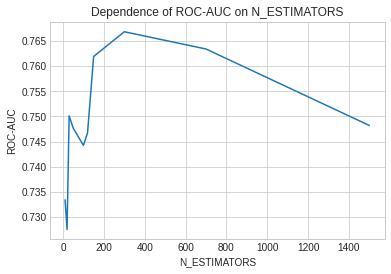

In [68]:
plt.plot(a, b)
plt.title('Dependence of ROC-AUC on N_ESTIMATORS')
plt.xlabel('N_ESTIMATORS')
plt.ylabel('ROC-AUC')
plt.show()

In [0]:
#Как мы видим, лучшее значение ROC-AUC выдает на числе n_estimators = 300. Далее уже снижается качество на тестовой выборке. Поэтому выберем оптимум = 300.
#Вывод такой: с ростом числа эстиматоров качество растет до определенного момента, а дальше снижается (ну или выходит на ассимптоту)

In [104]:
roc_znach2 = []
for i in m:
    les_clf = RandomForestClassifier(min_samples_leaf=i, random_state=11)
    les_clf.fit(X_train, y_train)
    les_preds = les_clf.predict(X_test)
    s = roc_auc_score(y_test, les_preds)
    q = roc_auc_score(y_train, les_clf.predict(X_train))
    roc_znach2.append(s)
    print('min_samples_leaf = ', i, 'ROC-AUC на TRAIN = ', q, 'ROC-AUC на TEST = ', s, end='\n')

min_samples_leaf =  1 ROC-AUC на TRAIN =  1.0 ROC-AUC на TEST =  0.7442385173247381
min_samples_leaf =  2 ROC-AUC на TRAIN =  0.9671204964341948 ROC-AUC на TEST =  0.7364222401289283
min_samples_leaf =  3 ROC-AUC на TRAIN =  0.9189821246642587 ROC-AUC на TEST =  0.7398468976631749
min_samples_leaf =  4 ROC-AUC на TRAIN =  0.8832777623413911 ROC-AUC на TEST =  0.7408138597904916
min_samples_leaf =  5 ROC-AUC на TRAIN =  0.85718255070853 ROC-AUC на TEST =  0.7163174858984689
min_samples_leaf =  6 ROC-AUC на TRAIN =  0.8393766787070484 ROC-AUC на TEST =  0.7290491539081387
min_samples_leaf =  7 ROC-AUC на TRAIN =  0.8365518199499862 ROC-AUC на TEST =  0.7197421434327156
min_samples_leaf =  10 ROC-AUC на TRAIN =  0.8117764193757524 ROC-AUC на TEST =  0.7231668009669622
min_samples_leaf =  25 ROC-AUC на TRAIN =  0.7446049828656108 ROC-AUC на TEST =  0.6996373892022563
min_samples_leaf =  50 ROC-AUC на TRAIN =  0.6765768268963601 ROC-AUC на TEST =  0.698146655922643


In [0]:
c = np.array(m)
d = np.array(roc_znach2)

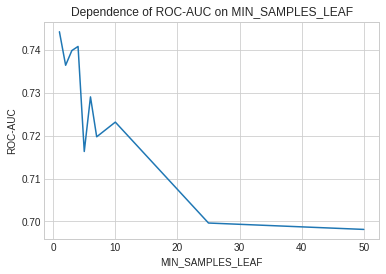

In [106]:
plt.plot(c, d)
plt.title('Dependence of ROC-AUC on MIN_SAMPLES_LEAF')
plt.xlabel('MIN_SAMPLES_LEAF')
plt.ylabel('ROC-AUC')
plt.show()

In [0]:
#C ростом минимального числа элементов в листе качество не растет, причем на трейне тоже. Поэтому выбираем судя по нашему графику либо 1, либо 5.
#Думаю, что лучше 4 - не особо убавляется качество, однако раз меньше мин числа элементов в листе - мы не будем сильно переобучаться и грузить алгоритм.
#Вывод такой: на начальных значениях мин кол-ва элементов в листе мы еще можем выбирать, но с дальнейшим ростом мин числа элементов в листе,
#качество не вырастет - оно будет падать, качество алгоритма снизится.

**5. (1 балл)**. Посмотрите, оказались ли какие-то признаки более важными, чем остальные? Воспользуйтесь соответствующим аттрибутом случайного леса в библиотеке sklearn, чтобы построить barplot.

In [0]:
pd.DataFrame({
    'feature': data.columns[:-1],
    'importance': les_clf.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

,feature,importance
0,Glucose,0.393227
1,BMI,0.171129
2,Age,0.129739
3,DiabetesPedigreeFunction,0.100695
4,Pregnancies,0.072192
5,BloodPressure,0.046535
6,Insulin,0.044576
7,SkinThickness,0.041906


Text(0.5, 1.0, 'Важность признаков')

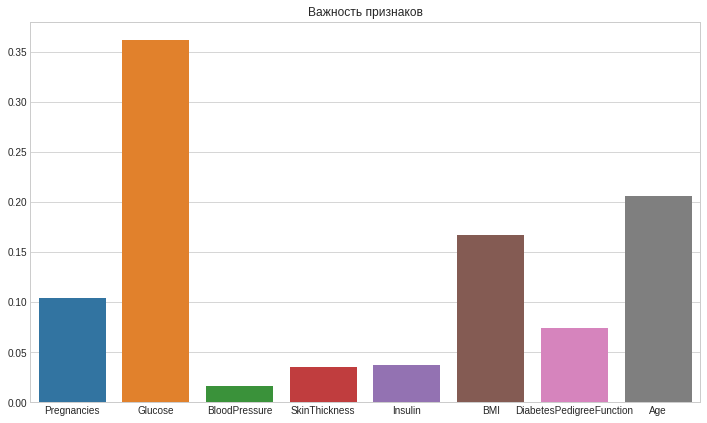

In [124]:
import seaborn as sns
plt.figure(figsize=(12, 7))
sns.barplot(data.columns[:-1], les_clf.feature_importances_)
plt.title('Важность признаков')

In [0]:
#Как мы видим и из таблицы, и из графика - самый важный признак для нашей модели - глюкоза, она наиболее сильно влияет на решение модели,
#Также для нашей модели важен возраст человека, индекс массы тела, беременность.
#Все эти признаки превышают порог 10% важности для нашей модели при выборе ответа.
#Мы можем сказать, что модель у нас адекватная - потому что с жизнью это кореллирует.
#Остальные признаки не так важны для нашей модели, интересно, что наследственность в диабете оказалась среди них.

**6. (2 балла)** Обучите HistGradientBoostingClassifier и GradientBoostingClassifier из sklearn. Опишите подробно, в чем заключается разница этих моделей. Подберите подходящее количество деревьев и проанализируйте метрики, с которыми мы работали выше.

In [0]:
#Разница этих моделей заключается в том, что HistGradientBoostingClassifier строит модель быстрее, так ак он, в отличие от GradientBoostingClassifier 
#при построении вершины дерева вместо перебора по всем значениям признака производит перебор значений гистограммы этого признака. (из семинара 14)
#Кроме того, в отличие от GradientBoostingClassifier, который строят дерево по уровням, HistGradientBoostingClassifier на каждом шаге 
#строит вершину, дающую наибольшее уменьшение функционала. 

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
roc_znach_3=[]
for n_estimators in range(1, 500, 50):
    rf = GradientBoostingClassifier(n_estimators=n_estimators, random_state = 11).fit(X_train, y_train)
    roc_znach_3.append(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
    print (n_estimators, 'ROC-AUC на TRAIN =',  roc_auc_score(y_train, rf.predict_proba(X_train)[:,1]), 'ROC-AUC на TEST =',  roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

1 ROC-AUC на TRAIN = 0.8341977709857675 ROC-AUC на TEST = 0.7662771958098309
51 ROC-AUC на TRAIN = 0.9557593158593436 ROC-AUC на TEST = 0.8590652699435939
101 ROC-AUC на TRAIN = 0.9880985458923774 ROC-AUC на TEST = 0.853102336825141
151 ROC-AUC на TRAIN = 0.9973758142693958 ROC-AUC на TEST = 0.8463336019339243
201 ROC-AUC на TRAIN = 0.99924361705412 ROC-AUC на TEST = 0.8423045930701046
251 ROC-AUC на TRAIN = 0.9999536908400481 ROC-AUC на TEST = 0.836986301369863
301 ROC-AUC на TRAIN = 1.0 ROC-AUC на TEST = 0.8356164383561644
351 ROC-AUC на TRAIN = 1.0 ROC-AUC на TEST = 0.8321514907332797
401 ROC-AUC на TRAIN = 1.0 ROC-AUC на TEST = 0.8321514907332797
451 ROC-AUC на TRAIN = 1.0 ROC-AUC на TEST = 0.8301369863013699


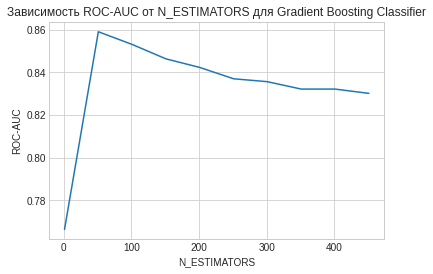

In [135]:
a = [1,51,101,151,201,251,301,351,401,451]
b = np.array(roc_znach_3)

plt.plot(a, b)
plt.title('Зависимость ROC-AUC от N_ESTIMATORS для Gradient Boosting Classifier')
plt.xlabel('N_ESTIMATORS')
plt.ylabel('ROC-AUC')
plt.show()

In [0]:
#Проанализировав ROC-AUC понимаем, что в нашем случае оптимальное число деревьев - в районе не более 50-60.
#Подберем более точно

In [137]:
for n_estimators in range(10, 70, 3):
    rf = GradientBoostingClassifier(n_estimators=n_estimators, random_state = 11).fit(X_train, y_train)
    roc_znach_3.append(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
    print (n_estimators, 'ROC-AUC на TRAIN =',  roc_auc_score(y_train, rf.predict_proba(X_train)[:,1]), 'ROC-AUC на TEST =',  roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

10 ROC-AUC на TRAIN = 0.8992003951714982 ROC-AUC на TEST = 0.8383964544721998
13 ROC-AUC на TRAIN = 0.9028896915809947 ROC-AUC на TEST = 0.8474617244157937
16 ROC-AUC на TRAIN = 0.9056605229847797 ROC-AUC на TEST = 0.8486704270749396
19 ROC-AUC на TRAIN = 0.9091954555277701 ROC-AUC на TEST = 0.8514101531023368
22 ROC-AUC на TRAIN = 0.9154317557346177 ROC-AUC на TEST = 0.8548751007252215
25 ROC-AUC на TRAIN = 0.9205643542959464 ROC-AUC на TEST = 0.8543916196615633
28 ROC-AUC на TRAIN = 0.9250949337779013 ROC-AUC на TEST = 0.8570910556003224
31 ROC-AUC на TRAIN = 0.9292010126269643 ROC-AUC на TEST = 0.857856567284448
34 ROC-AUC на TRAIN = 0.9325815813034485 ROC-AUC на TEST = 0.8586623690572119
37 ROC-AUC на TRAIN = 0.9374594794850422 ROC-AUC на TEST = 0.8585817888799355
40 ROC-AUC на TRAIN = 0.941611867494057 ROC-AUC на TEST = 0.8589846897663175
43 ROC-AUC на TRAIN = 0.942970269519311 ROC-AUC на TEST = 0.8600322320709105
46 ROC-AUC на TRAIN = 0.9482572319471457 ROC-AUC на TEST = 0.859951

In [0]:
#Ок. Самый высокий скор у нас на 43 деревьях. Далее он начинает переобучаться. Выберем это количество и проверим наши старые метрики качества.

In [139]:
mode = GradientBoostingClassifier(n_estimators=43, random_state = 11).fit(X_train, y_train)
print('Accuracy TRAIN = ', accuracy_score(y_train, mode.predict(X_train)), 'Accuracy TEST = ', accuracy_score(y_test, mode.predict(X_test)))
print('Precision TRAIN = ', precision_score(y_train, mode.predict(X_train)), 'Precision TEST = ', precision_score(y_test, mode.predict(X_test)))
print('Recall TRAIN = ', recall_score(y_train, mode.predict(X_train)), 'Recall TEST = ', recall_score(y_test, mode.predict(X_test)))

Accuracy TRAIN =  0.8696461824953445 Accuracy TEST =  0.7489177489177489
Precision TRAIN =  0.869281045751634 Precision TEST =  0.68
Recall TRAIN =  0.726775956284153 Recall TEST =  0.6


In [0]:
#Для того, чтобы проанализировать сравним с тем, что получили в случайном лесу: все показатели остались примерно на том же уровне, но немного упало
#все, кроме реколла. (не сильно). Однако качество все еще остается средним. Не плохое, но и не идеальное.

In [0]:
#Теперь с HistGradientBoostingClassifier. Здесь число деревьев я так понял подбираем с помощью max_iter.

In [0]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier

In [144]:
roc_znach_4=[]
for max_iter in range(10, 500, 50):
    rf = HistGradientBoostingClassifier(max_iter = max_iter, random_state = 11).fit(X_train, y_train)
    roc_znach_4.append(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
    print (max_iter, 'ROC-AUC на TRAIN =',  roc_auc_score(y_train, rf.predict_proba(X_train)[:,1]), 'ROC-AUC на TEST=',  roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

10 ROC-AUC на TRAIN = 0.9294634312000247 ROC-AUC на TEST= 0.8400080580177276
60 ROC-AUC на TRAIN = 0.9995369084004816 ROC-AUC на TEST= 0.8452054794520548
110 ROC-AUC на TRAIN = 1.0 ROC-AUC на TEST= 0.8387590652699436
160 ROC-AUC на TRAIN = 1.0 ROC-AUC на TEST= 0.8326349717969379
210 ROC-AUC на TRAIN = 1.0 ROC-AUC на TEST= 0.8291700241740532
260 ROC-AUC на TRAIN = 1.0 ROC-AUC на TEST= 0.8282836422240129
310 ROC-AUC на TRAIN = 1.0 ROC-AUC на TEST= 0.8236099919419824
360 ROC-AUC на TRAIN = 1.0 ROC-AUC на TEST= 0.82232070910556
410 ROC-AUC на TRAIN = 1.0 ROC-AUC на TEST= 0.8221595487510074
460 ROC-AUC на TRAIN = 1.0 ROC-AUC на TEST= 0.820467365028203


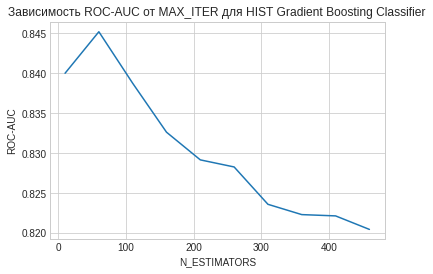

In [145]:
a = [10,60,110,160,210,260,310,360,410,460]
b = np.array(roc_znach_4)

plt.plot(a, b)
plt.title('Зависимость ROC-AUC от MAX_ITER для HIST Gradient Boosting Classifier')
plt.xlabel('N_ESTIMATORS')
plt.ylabel('ROC-AUC')
plt.show()

In [0]:
#Как мы видим, идеальное количество находится где-то в районе 10-80. Подберем точнее.

In [149]:
roc_znach_5=[]
aspis = []
for max_iter in range(10, 80, 3):
    rf = HistGradientBoostingClassifier(max_iter = max_iter, random_state = 11).fit(X_train, y_train) 
    aspis.append(max_iter)
    roc_znach_5.append(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
    print (max_iter, 'ROC-AUC на TRAIN =',  roc_auc_score(y_train, rf.predict_proba(X_train)[:,1]), 'ROC-AUC на TEST=',  roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

10 ROC-AUC на TRAIN = 0.9294634312000247 ROC-AUC на TEST= 0.8400080580177276
13 ROC-AUC на TRAIN = 0.9385554629372357 ROC-AUC на TEST= 0.8494359387590653
16 ROC-AUC на TRAIN = 0.9480411225340372 ROC-AUC на TEST= 0.8510878323932313
19 ROC-AUC на TRAIN = 0.9533589577351733 ROC-AUC на TEST= 0.8527800161160356
22 ROC-AUC на TRAIN = 0.9596647216819487 ROC-AUC на TEST= 0.852054794520548
25 ROC-AUC на TRAIN = 0.967305733074002 ROC-AUC на TEST= 0.8542304593070106
28 ROC-AUC на TRAIN = 0.9741594887468741 ROC-AUC на TEST= 0.8531829170024174
31 ROC-AUC на TRAIN = 0.9788367139020098 ROC-AUC на TEST= 0.8503626107977438
34 ROC-AUC на TRAIN = 0.9833441388039887 ROC-AUC на TEST= 0.8501208702659145
37 ROC-AUC на TRAIN = 0.9866320891605693 ROC-AUC на TEST= 0.8522965350523771
40 ROC-AUC на TRAIN = 0.99042944027662 ROC-AUC на TEST= 0.853908138597905
43 ROC-AUC на TRAIN = 0.9936247723132969 ROC-AUC на TEST= 0.8534246575342466
46 ROC-AUC на TRAIN = 0.9959247939242383 ROC-AUC на TEST= 0.8513295729250605
49 R

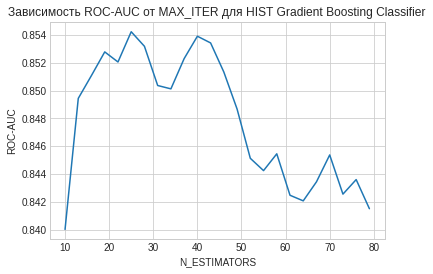

In [150]:
a = np.array(aspis)
b = np.array(roc_znach_5)

plt.plot(a, b)
plt.title('Зависимость ROC-AUC от MAX_ITER для HIST Gradient Boosting Classifier')
plt.xlabel('N_ESTIMATORS')
plt.ylabel('ROC-AUC')
plt.show()

In [0]:
#Как мы видим, оптимальное число деревьев - 25. Обучим модель и посмотрим старые метрики.

In [151]:
mode = HistGradientBoostingClassifier(max_iter = 25, random_state = 11).fit(X_train, y_train) 
print('Accuracy TRAIN = ', accuracy_score(y_train, mode.predict(X_train)), 'Accuracy TEST = ', accuracy_score(y_test, mode.predict(X_test)))
print('Precision TRAIN = ', precision_score(y_train, mode.predict(X_train)), 'Precision TEST = ', precision_score(y_test, mode.predict(X_test)))
print('Recall TRAIN = ', recall_score(y_train, mode.predict(X_train)), 'Recall TEST = ', recall_score(y_test, mode.predict(X_test)))

Accuracy TRAIN =  0.8994413407821229 Accuracy TEST =  0.7662337662337663
Precision TRAIN =  0.9006211180124224 Precision TEST =  0.7246376811594203
Recall TRAIN =  0.7923497267759563 Recall TEST =  0.5882352941176471


In [0]:
#По сравнению с обычным градиентным бустингом (выше) Accuracy, Precision увеличились, реколл чуть упал. Однако случайный лес опередить не удалось.

**7. (1.5 балла)** Вспомните, что представляет собой [стэкинг моделей](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier). Возьмите в качестве базовых моделей любой ансамблевый метод из тех, которые были использованы выше, и простой классфикатор из уже вами изученных на курсе. Как final_estimator используйте лог-регресссию. Посчитайте метрики для мета-классификатора. Улучшилось ли качество?

In [0]:
#стакать будем случайный лес и классификатор стохастического градиентного спуска

In [0]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [0]:
base_learners = [ ('RandomForestClassifier', RandomForestClassifier(min_samples_leaf = 4, random_state=11)), 
                 ('SGDClassifier', SGDClassifier(loss="log", alpha=0.01, max_iter=100, fit_intercept=True, random_state=11))]

In [0]:
#далее обучаем стакнутый классификатор с финальным - лог регрессией и проверяем наши стандартные метрики

In [161]:
fin_clf = StackingClassifier(base_learners, final_estimator=LogisticRegression())
fin_clf.fit(X_train, y_train)
fin_preds = fin_clf.predict(X_test)
print('Accuracy TEST = ', accuracy_score(y_test, fin_preds))
print('Precision TEST = ', precision_score(y_test, fin_preds))
print('Recall TEST = ', recall_score(y_test, fin_preds))

Accuracy TEST =  0.7835497835497836
Precision TEST =  0.7536231884057971
Recall TEST =  0.611764705882353
ROC-AUC TEST =  0.7476631748589847


In [0]:
#Ура! Мы получили качество большее, чем все, что мы получали выше (по Accuracy, Presicion и Recall), и его уже можно назвать высоким.
#Да, качество улучшилось!

*tip: не забудьте завести список базовых алгоритмов*
<code>
base_learners = [
                 ('name1', model1(),
                 ('name2', model2())             
                ]

</code>